<a href="https://colab.research.google.com/github/Kamil11-del/DIGITAL-IMAGE-PROCESSING/blob/main/CHA_09_DIGITAL_IMG_PROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERROSION

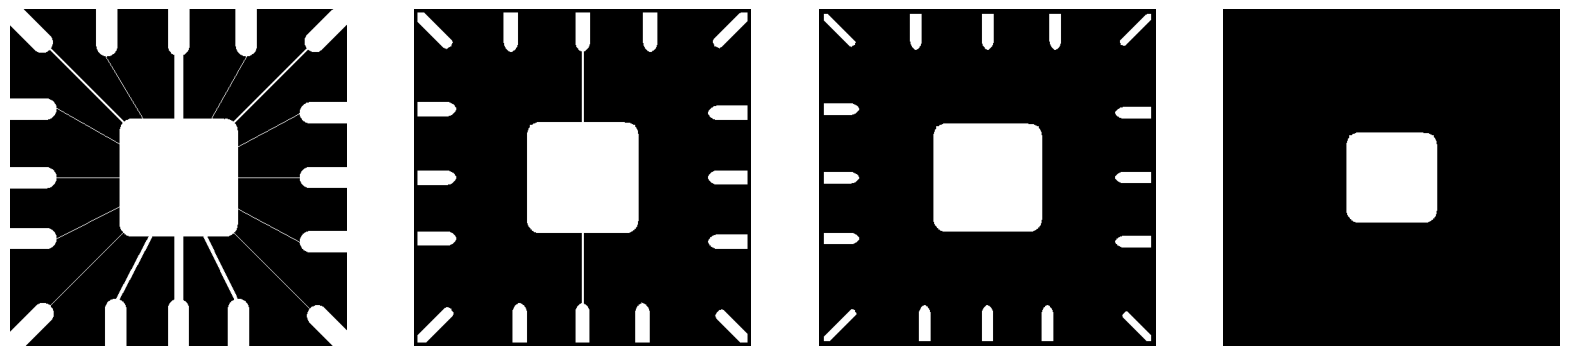

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0905(a)(wirebond-mask).tif',cv2.IMREAD_GRAYSCALE)

def apply_errosion(img,se):
  img = img/255
  row,col = se.shape
  padded_img = np.pad(img, pad_width=row//2, mode = 'constant')
  erroded_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+row, j:j+col]
      erroded_img[i,j] =  0 if np.min(neighbor * se ) == 0 else 1

  return erroded_img*255

structure_elem =np.ones((11,11))  # (15),(45) ;greater the size of the SE more will be the errosion

erroded_img_11 = apply_errosion(image,structure_elem)
erroded_img_15 = apply_errosion(image,np.ones((15,15)))
erroded_img_45 = apply_errosion(image,np.ones((41,41)))

img_list=[image,erroded_img_11,erroded_img_15,erroded_img_45]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image in enumerate(img_list):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')


# DILATION

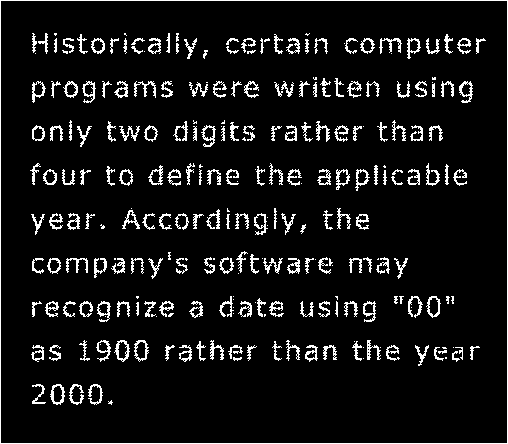

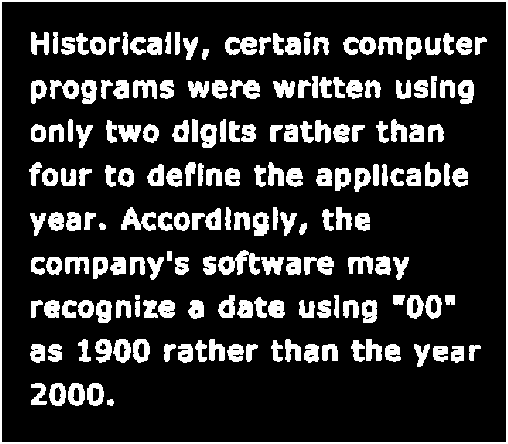

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

myimage = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0907(a)(text_gaps_1_and_2_pixels).tif',cv2.IMREAD_GRAYSCALE)

def apply_dilation(img,se):
  img = img/255
  row,col = se.shape
  padded_img = np.pad(img, pad_width=row//2, mode = 'constant')
  dailated_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+row, j:j+col]
      dailated_img[i,j] =  1 if np.max(neighbor *se) == 1 else 0
  return dailated_img*255


dilated_img = apply_dilation(myimage,np.ones((3,3)))
cv2_imshow(myimage)
cv2_imshow(dilated_img)


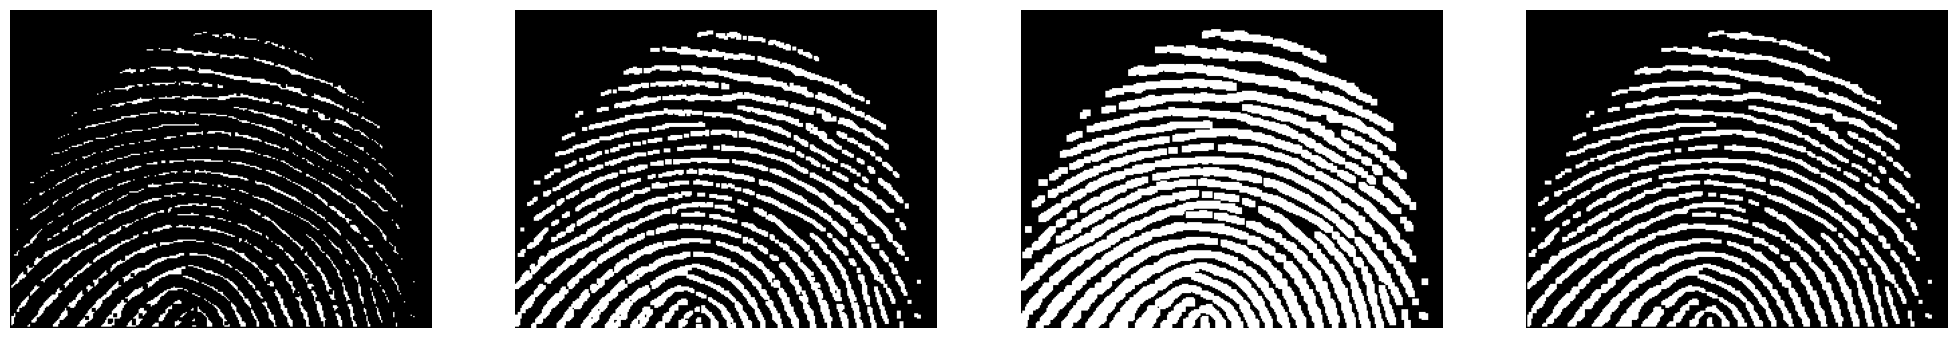

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0911(a)(noisy_fingerprint).tif',cv2.IMREAD_GRAYSCALE)

# to apply the errosion on img simple call the define function from above code
erod_img1 = apply_errosion(image,np.ones((3,3)))

# now to apply dilation on the image resulted from errosion simply call the define function above
dilated_img1 = apply_dilation(erod_img1,np.ones((3,3)))

# again apply the dilation on the openning by applying the dilation on dilated_result img
dilated_img2 = apply_dilation(dilated_img1,np.ones((3,3)))

#now apply the errosion for closing of the opening
erod_img2 = apply_errosion(dilated_img2,np.ones((3,3)))

images=[erod_img1,dilated_img1,dilated_img2,erod_img2 ]

fig, axes = plt.subplots(1, 4, figsize=(25, 8))

for i, image in enumerate(images):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')


# BOUNDRY EXTRACTION

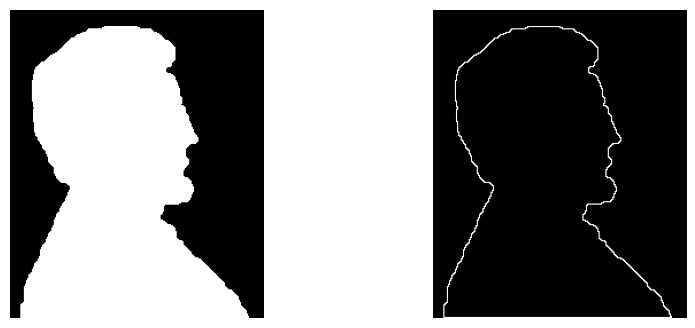

In [ ]:
import numpy as np, cv2, matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

original_img = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0914(a)(licoln from penny).tif',cv2.IMREAD_GRAYSCALE)

# HERE in this example first do the errosion of the original image
# for that simply call the defined function name apply_errosion

erroded_img = apply_errosion(original_img,np.ones((3,3)))

# now after aplying the errosion subtract the result from the original image
extr_boundry_img = original_img - erroded_img

imgs=[original_img,extr_boundry_img]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i, image in enumerate(imgs):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')


# HOLE FILLING

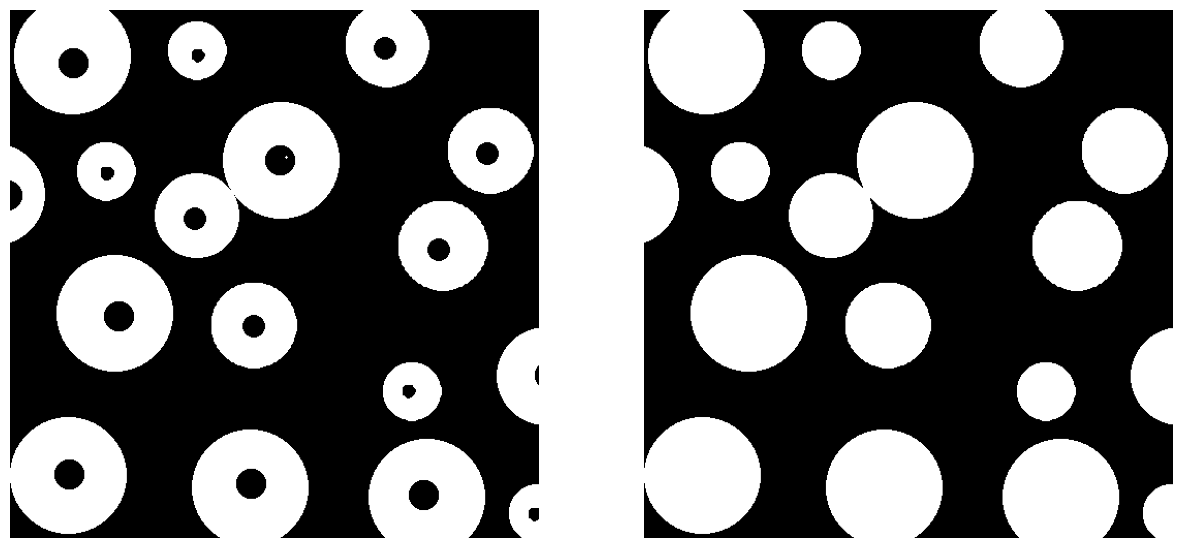

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def flood_fill(image, seed):
    # Create a mask of zeros with 2-pixel padding
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), dtype=np.uint8)

    # Copy input image to output image
    filled_image = np.copy(image)

    # Define the connectivity
    connectivity = 8

    # Define the fill color
    fill_color = 255

    # Define a stack for flood fill
    stack = [seed]

    # Flood fill loop
    while stack:
        # Pop the seed from the stack
        x, y = stack.pop()

        # Check if the pixel is within bounds and is not filled yet
        if 0 <= x < h and 0 <= y < w and filled_image[x, y] != fill_color:
            # Fill the pixel
            filled_image[x, y] = fill_color

            # Add neighboring pixels to the stack
            stack.extend(((x+1, y), (x-1, y), (x, y+1), (x, y-1)))

    return filled_image

def bitwise_not(image):
    return 255 - image

# Read the image
img = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0916(a)(region-filling-reflections).tif', cv2.IMREAD_GRAYSCALE)

# Copy the thresholded image
im_floodfill = img.copy()

# Floodfill from point (0, 0)
im_floodfill = flood_fill(im_floodfill, (0,0))

# Invert floodfilled image
im_floodfill_inv = bitwise_not(im_floodfill)

# Combine the two images to get the foreground
im_out = np.maximum(img, im_floodfill_inv)

imagess=[img,im_out]

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, image in enumerate(imagess):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')

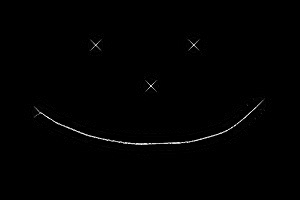

In [ ]:
import numpy as np, cv2, matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/skeletonization.jpg',cv2.IMREAD_GRAYSCALE)
def skeletonize(img):
#make sure its single channel
    size = np.size(img)
    tenth_size = size/10
    skel = np.zeros(img.shape,np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()
        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    return skel

skeletonized_img = skeletonize(image)
cv2_imshow(skeletonized_img)



# OPENING BY RECONSTRUCTION

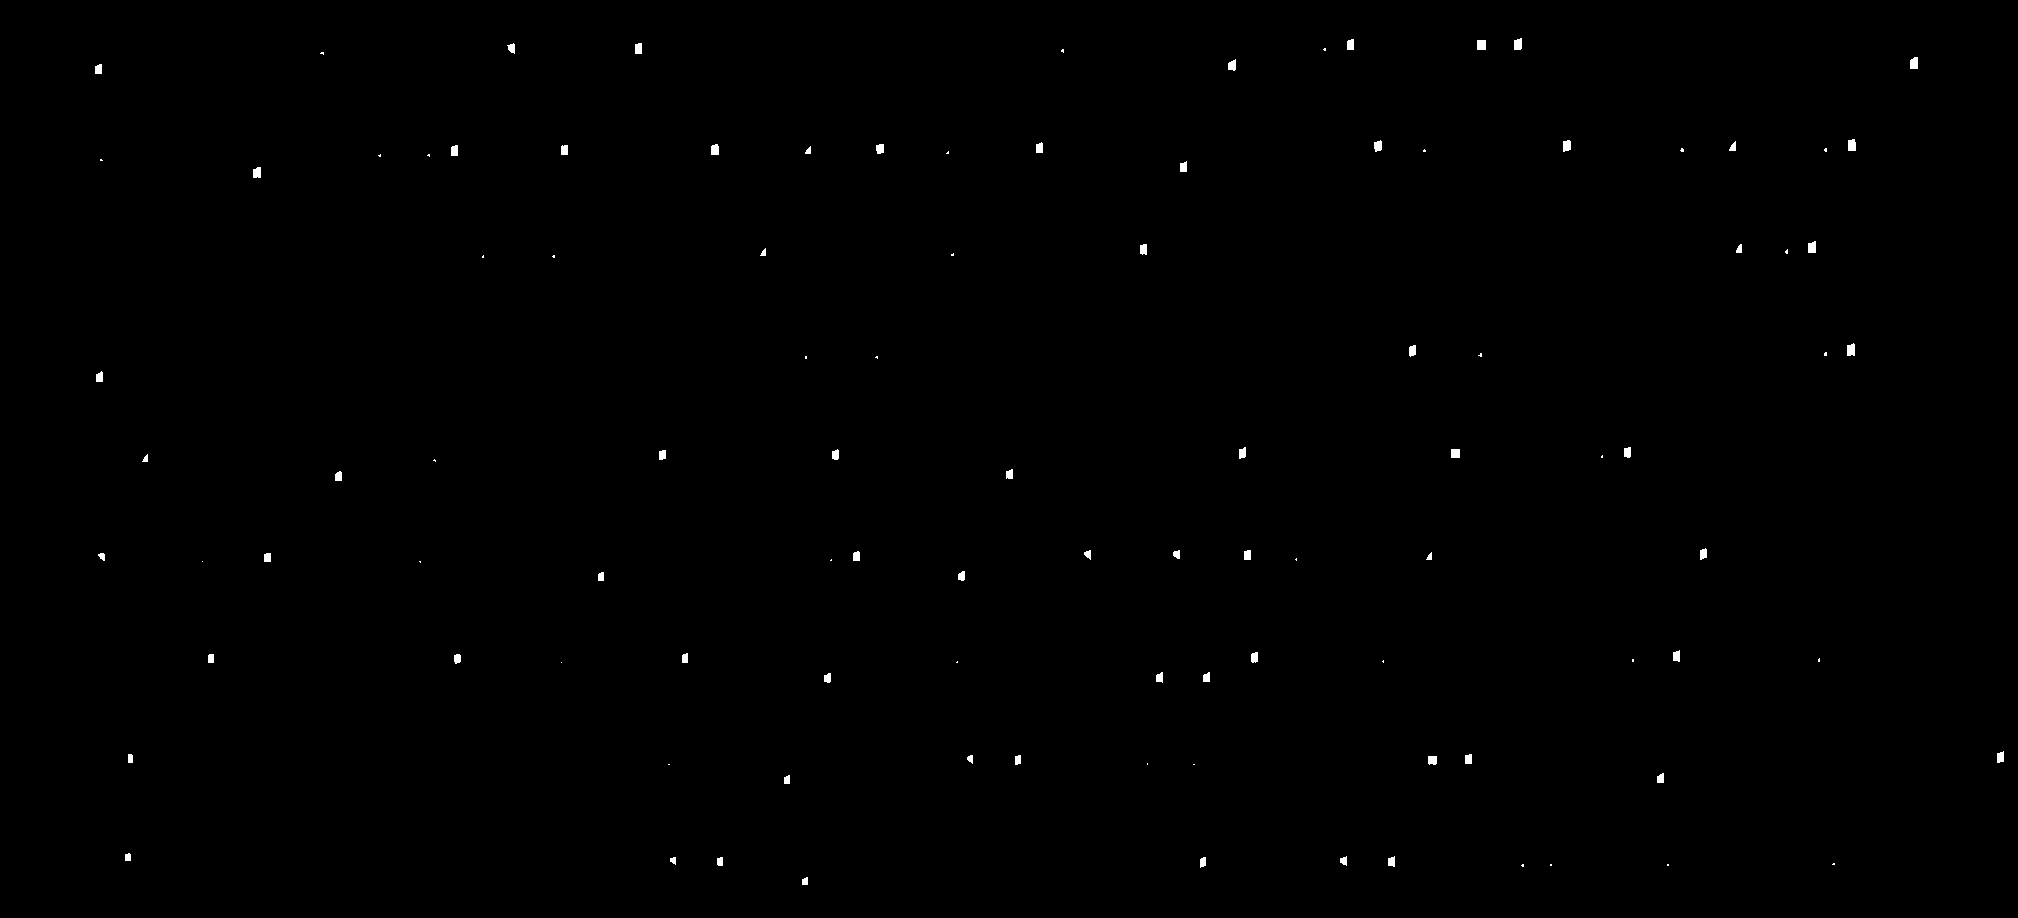

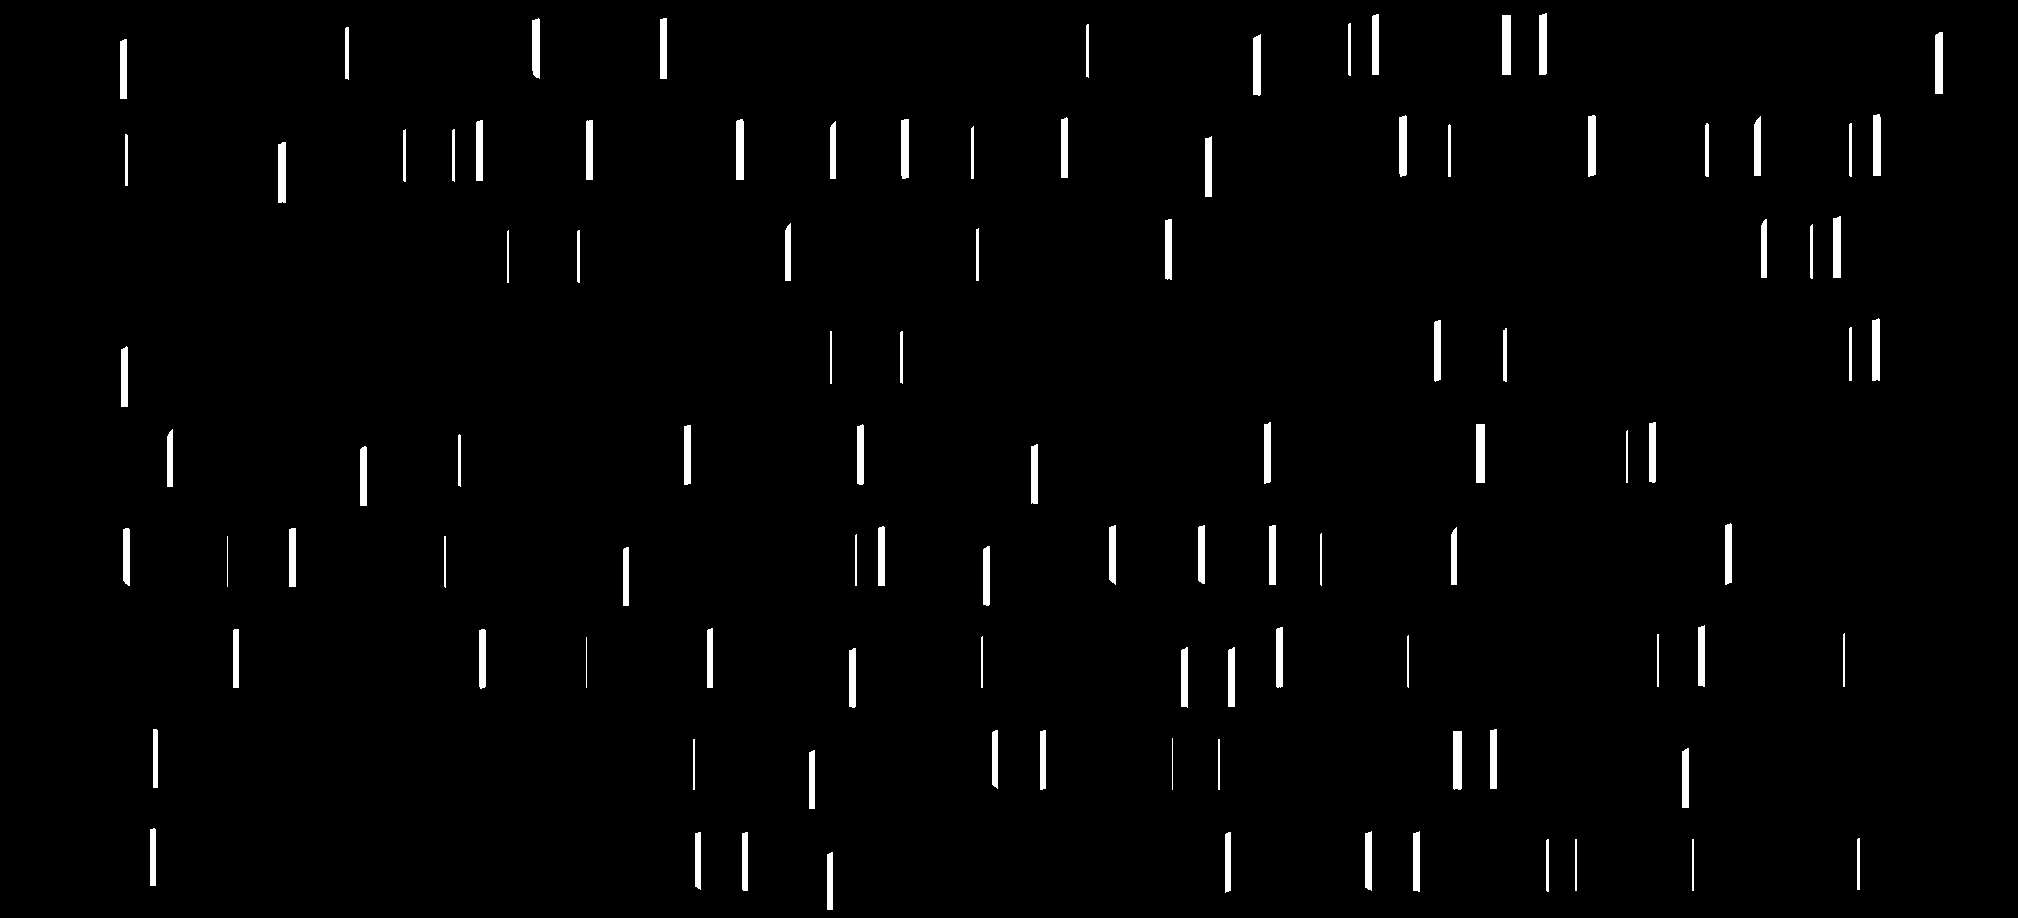

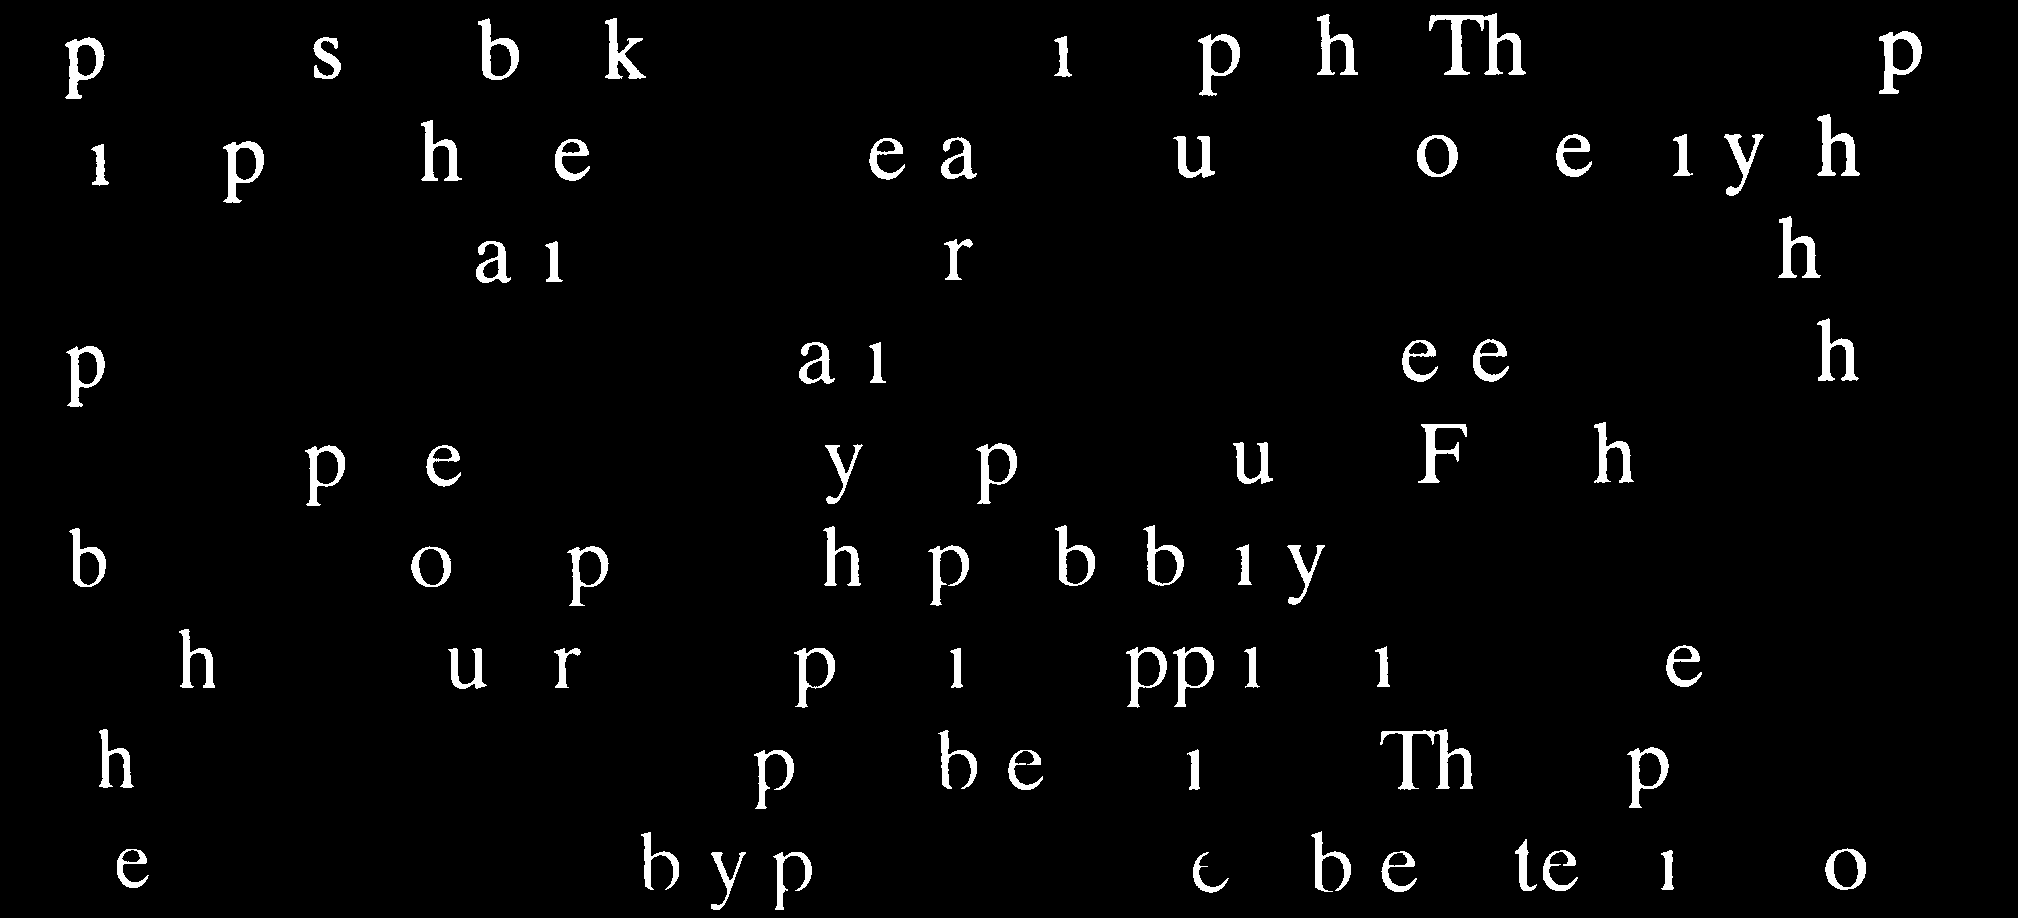

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def apply_errosion(img,se):
  img = img/255
  row,col = se.shape
  padded_img = np.pad(img, pad_width=row//2, mode = 'constant')
  erroded_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+row, j:j+col]
      erroded_img[i,j] =  0 if np.min(neighbor * se ) == 0 else 1

  return erroded_img*255
def apply_dilation(img,se):
  img = img/255
  row,col = se.shape
  padded_img = np.pad(img, pad_width=row//2, mode = 'constant')
  dailated_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+row, j:j+col]
      dailated_img[i,j] = 1 if np.max(neighbor *se) ==1 else 0
  return dailated_img * 255

def img_opening(img,se):
  img_errosion = apply_errosion(img,se)
  img_dailat = apply_dilation(img_errosion,se)
  return img_dailat

def geodesic_dailation(marker,se,mask):
  dailat_img = apply_dilation(marker,se)
  result = np.logical_and(dailat_img,mask)*255
  return result

def geodesic_errosion(marker,se,mask):
  errod_img = apply_errosion(marker,se)
  result = np.bitwise_or(errod_img,mask)*255
  return result

def reconst_by_dilation(marker,mask):
  se = np.ones((3,3))
  curr = marker
  pre = np.zeros_like(marker)
  while True:
    pre = curr
    curr = geodesic_dailation(pre,se,mask)
    if np.all(curr == pre):
      break
  reconst_image = curr
  return reconst_image

def opening_by_reconst(image,se):
  marker = apply_errosion(image,se)
  mask = image
  opened_image = reconst_by_dilation(marker,mask)
  return opened_image.astype(np.uint8)


original_img = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0929(a)(text_image).tif',cv2.IMREAD_GRAYSCALE)

img_errosion = apply_errosion(original_img,np.ones((51,1)))
img_open = img_opening(original_img,np.ones((51,1)))
img_open_reconst =opening_by_reconst(original_img,np.ones((51,1)))

cv2_imshow(img_errosion)
cv2_imshow(img_open)
cv2_imshow(img_open_reconst)


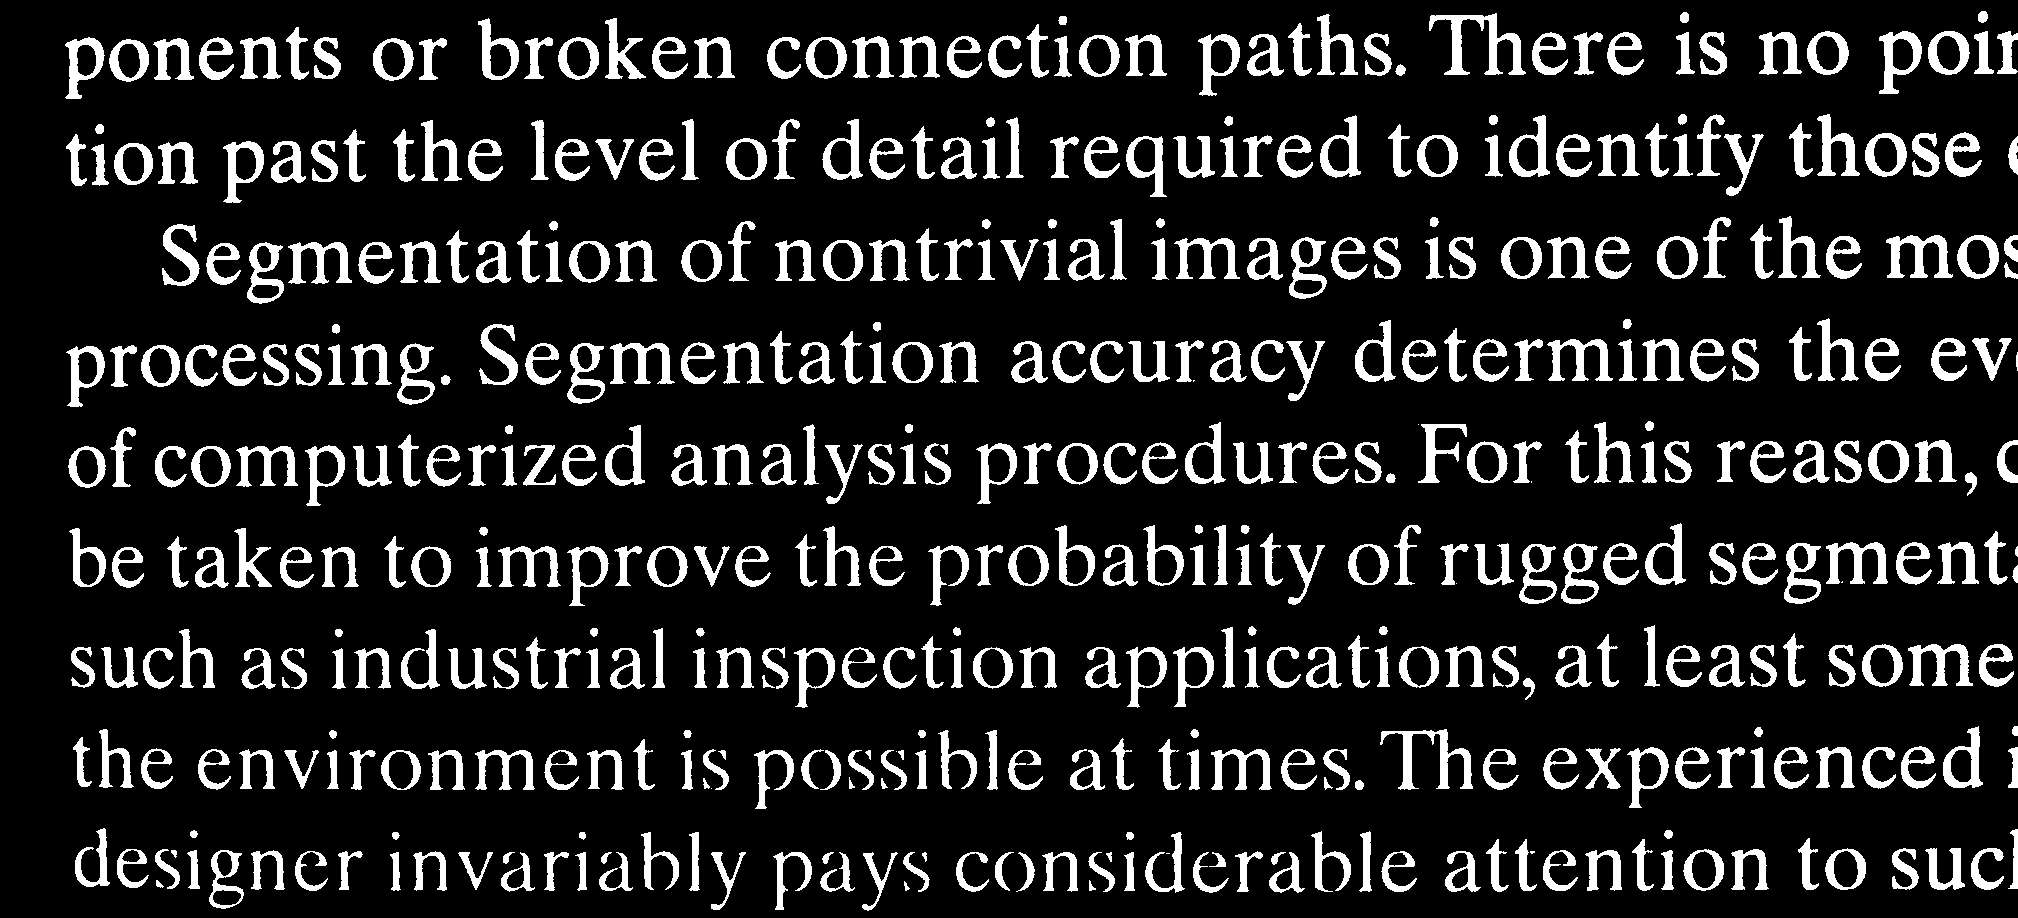

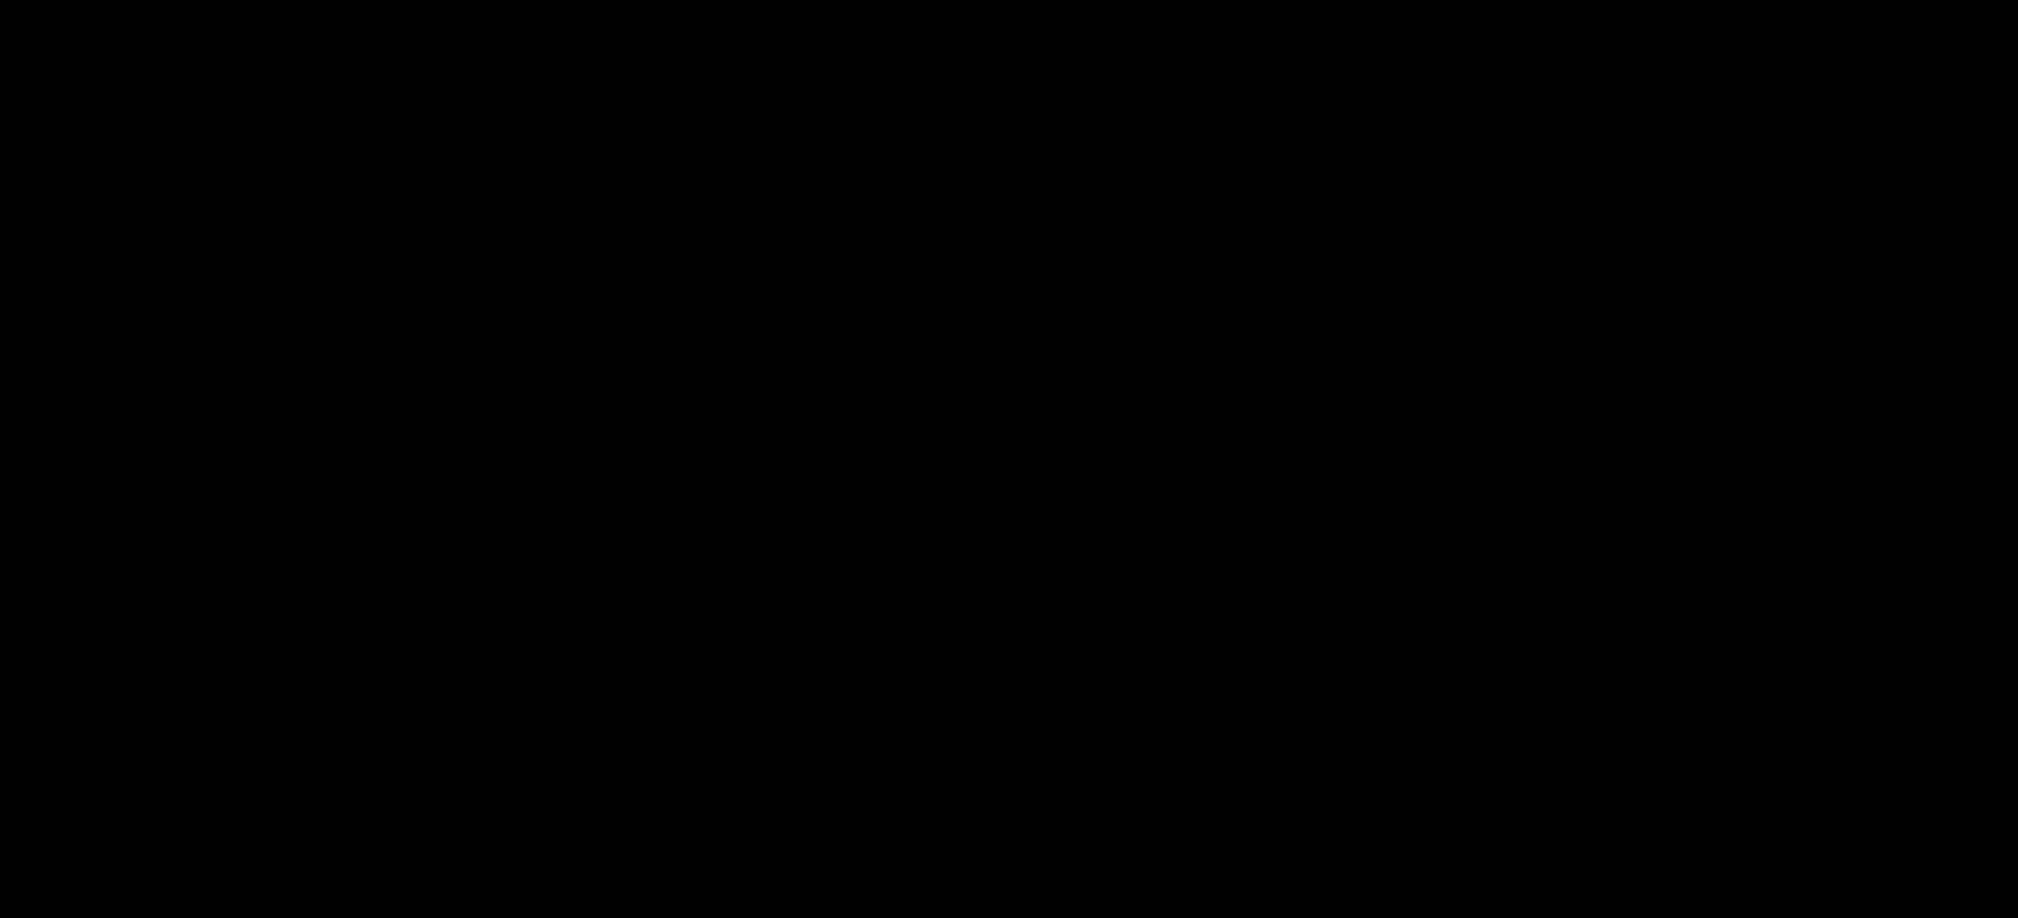

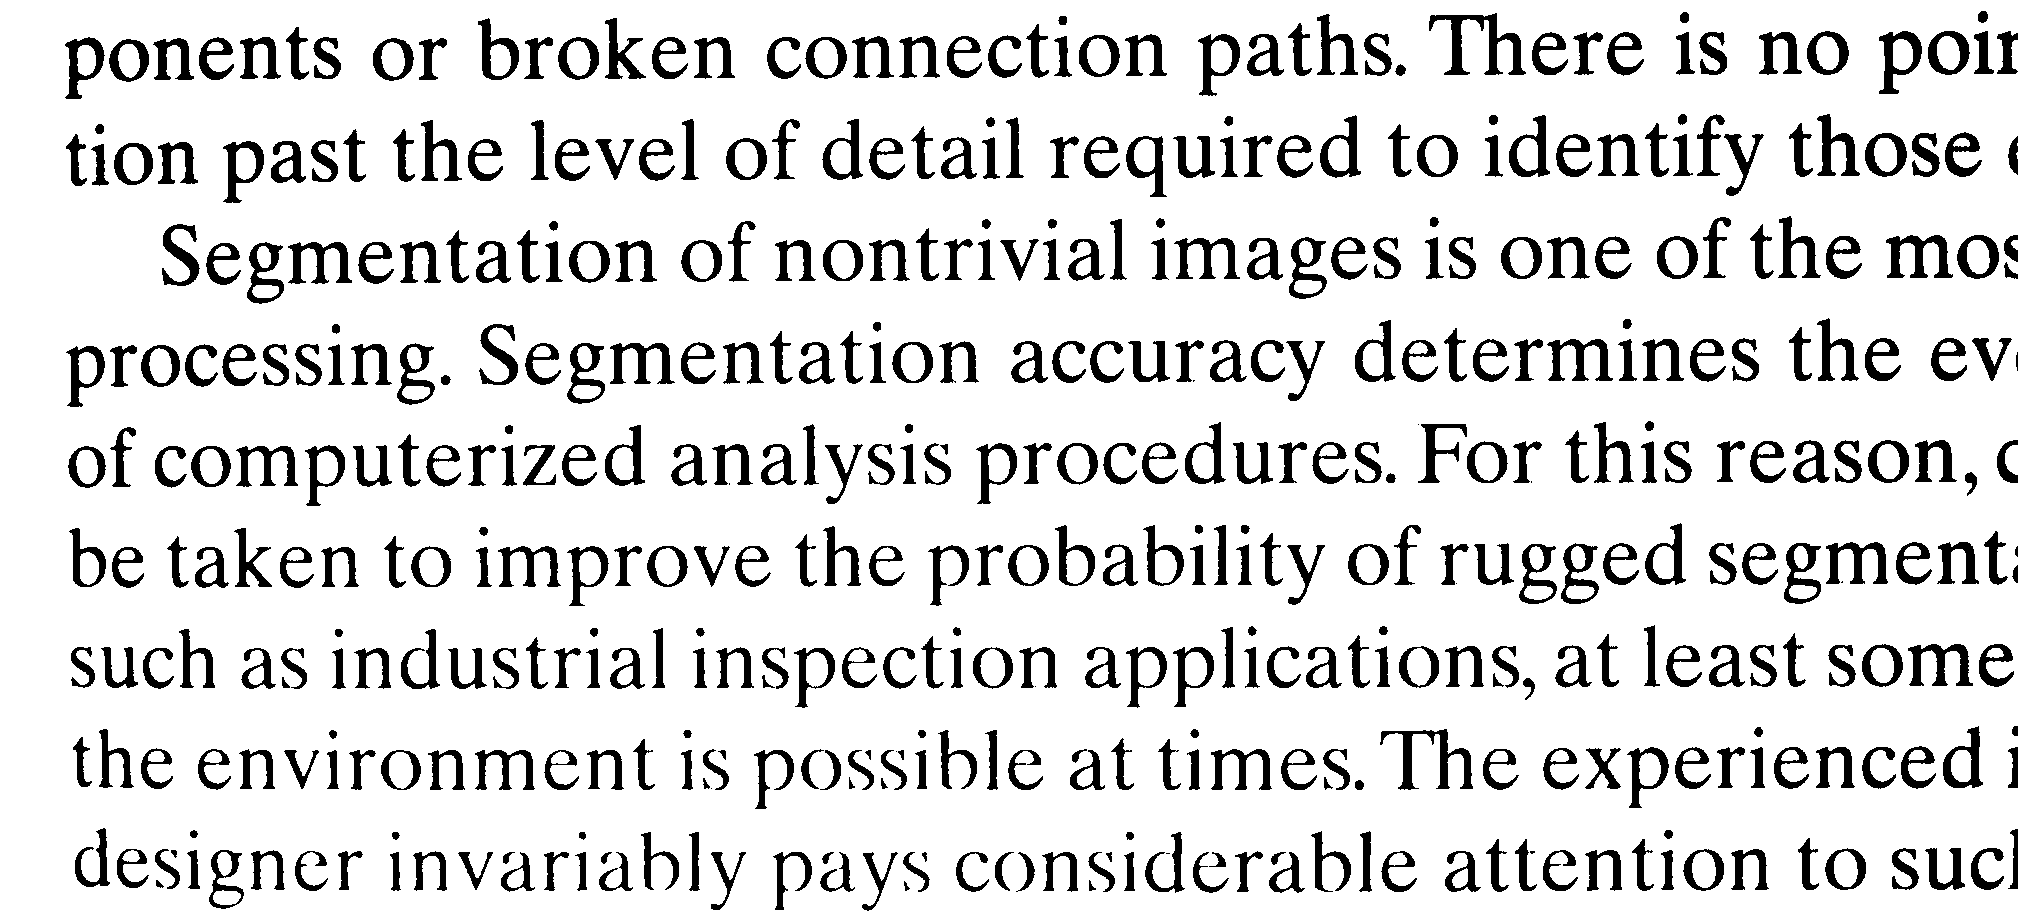

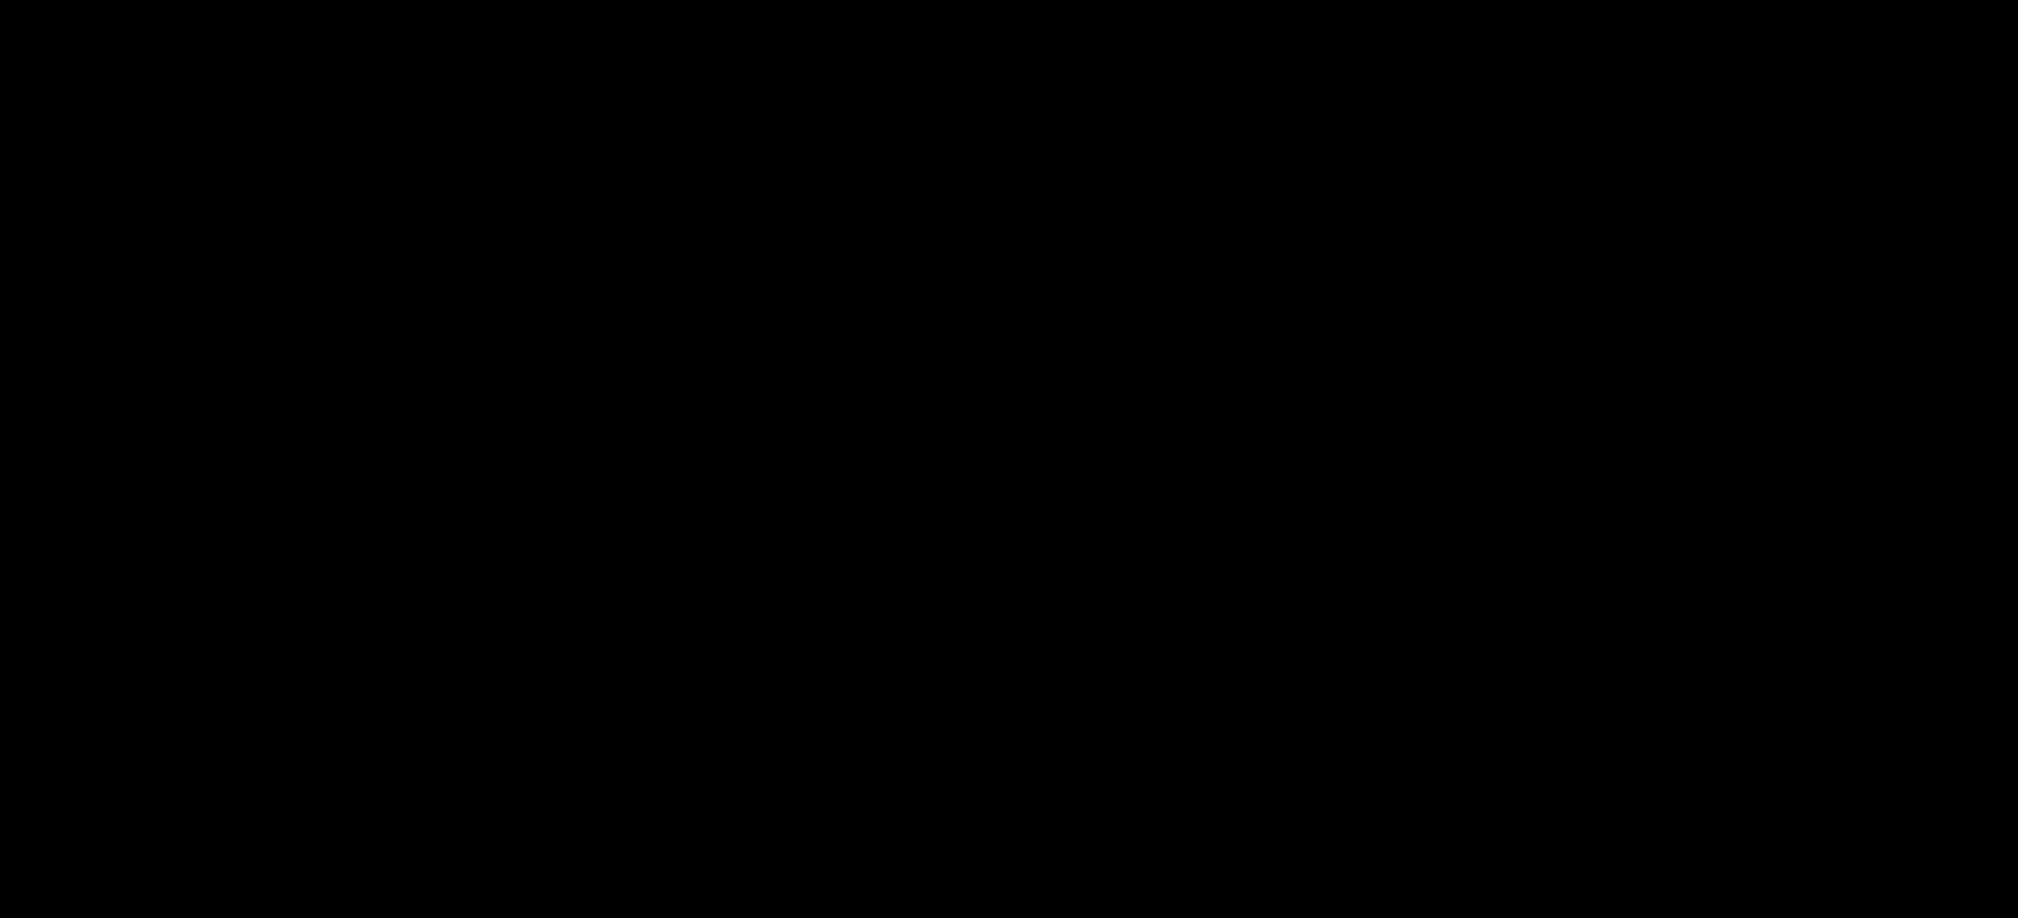

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0931(a)(text_image).tif',cv2.IMREAD_GRAYSCALE)
complmnt_img = 255 - image

def marker_img(image):
  h,w = image.shape
  mark_img = np.zeros_like(image)
  for x in range(h):
    for y in range(w):
      if y==0 or y==h-1 or x==0 or x == w-1:
        mark_img[x,y] =1-image[x,y]
  return mark_img
#apply dilation
def dilation_and_intersection(image):
    kernel = np.ones((3,3), dtype=np.uint8)
    dilated_img = cv2.dilate(image, kernel)
    # now intersect it from the marker image
    intersect_img = cv2.bitwise_and(image,dilated_img)
    return intersect_img

marker = marker_img(image)
holefill_img = dilation_and_intersection(marker)

# now for final result intersect the holefill image with complement of the original image
final_img = cv2.bitwise_and(holefill_img,complmnt_img)

cv2_imshow(image )
cv2_imshow(marker)
cv2_imshow(complmnt_img)

cv2_imshow(final_img)

# GRAYSCALE EROSION & DAILATION

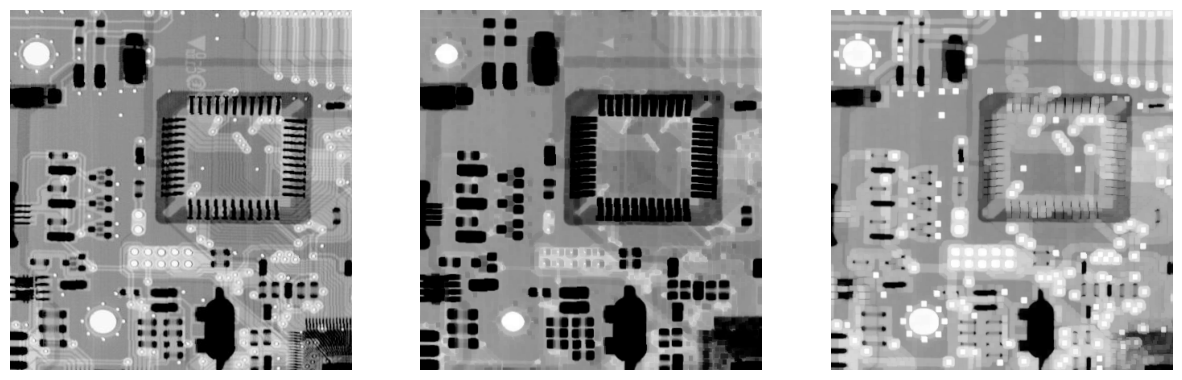

In [ ]:
import  numpy as np, cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0935(a)(ckt_board_section).tif',cv2.IMREAD_GRAYSCALE)
def errosion(img,se_rad):
  daimeter = 2 * se_rad +1
  structure_elem = np.ones((daimeter,daimeter))
  padded_img = np.pad(img, pad_width=daimeter//2, mode = 'reflect')
  erroded_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+daimeter, j:j+daimeter]
      erroded_img[i,j] =np.min(neighbor * structure_elem )

  return erroded_img

def dailation(img,se_rad):
  daimeter = 2 * se_rad +1
  structure_elem = np.ones((daimeter,daimeter))
  padded_img = np.pad(img, pad_width=daimeter//2, mode = 'reflect')
  erroded_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+daimeter, j:j+daimeter]
      erroded_img[i,j] =np.max(neighbor * structure_elem )

  return erroded_img

# finding the daimeter of the flat SE of radius 2
radius = 2
erosion_of_img = errosion(image,radius)
dailation_of_img = dailation(image,radius)

imgs_l=[image,erosion_of_img,dailation_of_img]

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for i, image in enumerate(imgs_l):
  axes[i].imshow(image,cmap='gray')
  axes[i].axis('off')



# MORPHOLOGICAL SMOOTHING

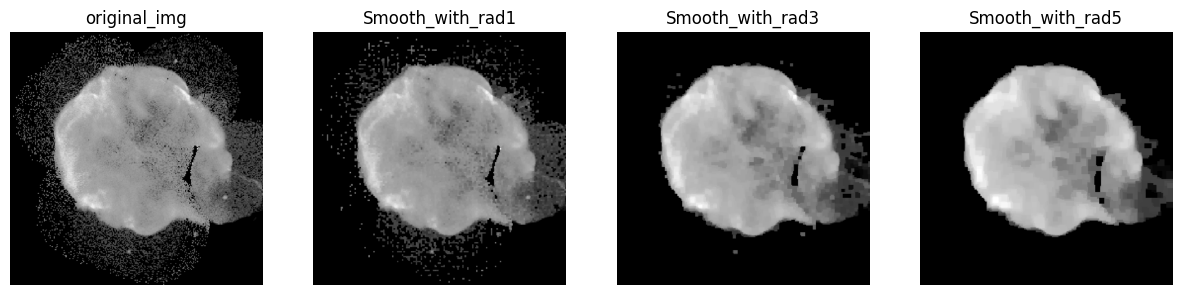

In [ ]:
orig_img = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0938(a)(cygnusloop_Xray_original).tif',cv2.IMREAD_GRAYSCALE)

def opening_of_img(img, radius):
  img_errosion = errosion(img,radius)
  img_dailation = dailation(img_errosion,radius)
  return img_dailation

def closing_of_opening(open_img,radius):
  img_dailation= dailation(open_img,radius)
  img_errosion = errosion(img_dailation,radius)
  return img_errosion

# opening and closing of the original image by radius 1
radius = [1,3,5] # 1,3,5 different for different result
img_open_rad1= opening_of_img(orig_img,radius[0])
smooth_img_rad1 = closing_of_opening(img_open_rad1,radius[0])

# opening and closing of the original image by radius 3
img_open_rad3 = opening_of_img(orig_img,radius[1])
smooth_img_rad3 = closing_of_opening(img_open_rad3,radius[1])

# opening and closing of the original image by radius 5
img_open_rad5= opening_of_img(orig_img,radius[2])
smooth_img_rad5 = closing_of_opening(img_open_rad5,radius[2])

images_list=[orig_img,smooth_img_rad1,smooth_img_rad3,smooth_img_rad5]
imgs_titles = ['original_img','Smooth_with_rad1','Smooth_with_rad3','Smooth_with_rad5']
fig, axes = plt.subplots(1, 4, figsize=(15, 10))

for i, (image,title) in enumerate(zip(images_list,imgs_titles)):
  axes[i].imshow(image,cmap='gray')
  axes[i].set_title(title)
  axes[i].axis('off')


# MORPHOLOGICAL GRADIENT

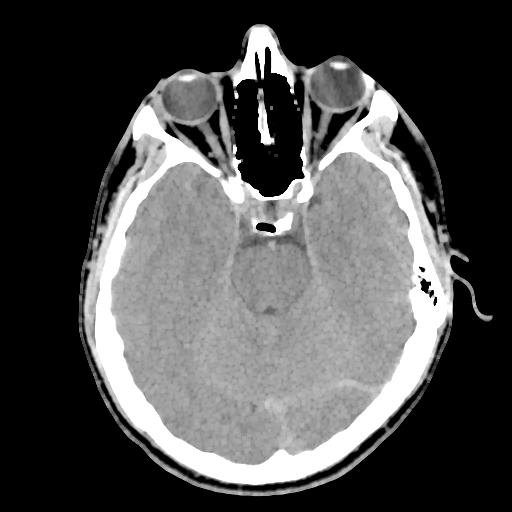

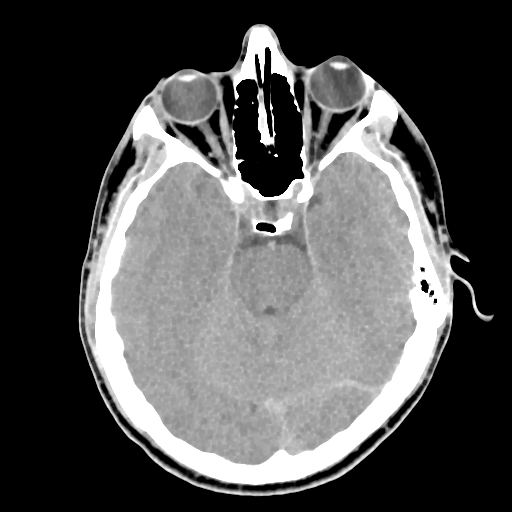

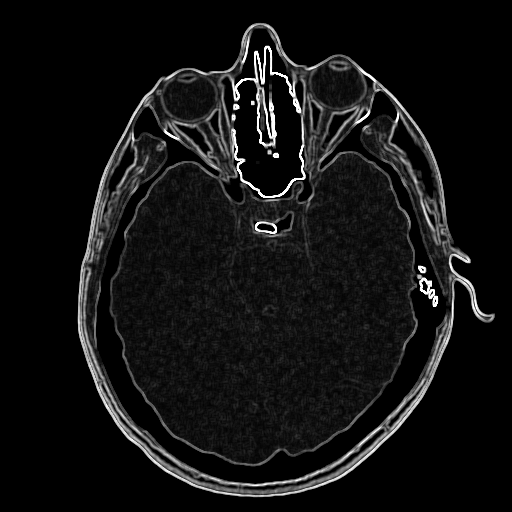

In [ ]:
import  numpy as np, cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

head_img = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0939(a)(headCT-Vandy).tif',cv2.IMREAD_GRAYSCALE)
def aply_dilatn(img,se_size):
  img = img /255
  structure_elem = np.ones((se_size,se_size))
  padded_img = np.pad(img, pad_width=se_size//2, mode = 'constant')
  dailated_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+se_size, j:j+se_size]
      dailated_img[i,j] =np.max(neighbor * structure_elem )
  return dailated_img*255

def aply_errosn(img,se_size):
  img = img /255
  structure_elem = np.ones((se_size,se_size))
  padded_img = np.pad(img, pad_width=se_size//2, mode = 'constant')
  erroded_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+se_size, j:j+se_size]
      erroded_img[i,j] =np.min(neighbor * structure_elem )
  return erroded_img*255

def img_opening(img,se_size):
  img_errosion = aply_errosn(img,se_size)
  img_dailation = aply_dilatn(img_errosion,se_size)
  return img_dailation

def img_closing(img,se_size):
  img_dailation= aply_dilatn(img,se_size)
  img_errosion = aply_errosn(img_dailation,se_size)
  return img_errosion

struct_e_size = 3

img_opened = img_opening(head_img,struct_e_size)
img_closed = img_closing(head_img,struct_e_size)

cv2_imshow(img_opened)
cv2_imshow(img_closed)

img_erod = aply_errosn(head_img,3)
img_dailat = aply_dilatn(head_img,3)

gradient_img = img_dailat - img_erod
cv2_imshow(gradient_img)

# TEXTURAL SEGMENTATION

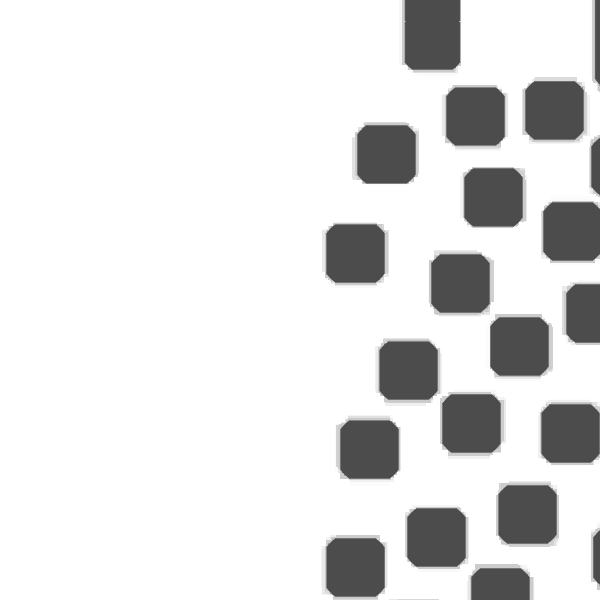

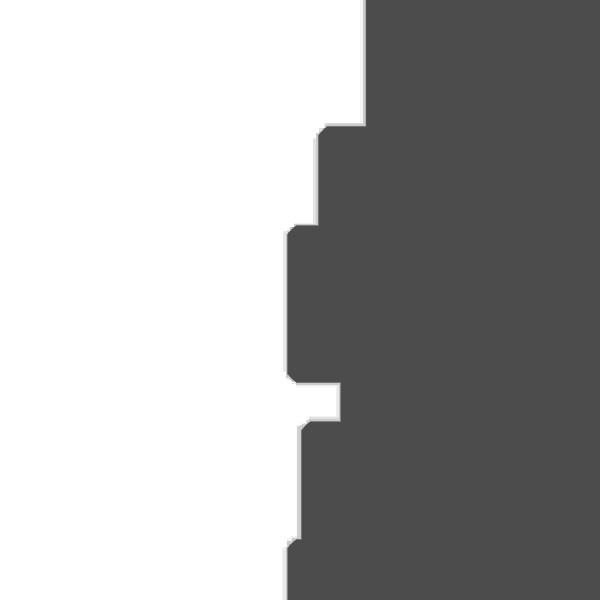

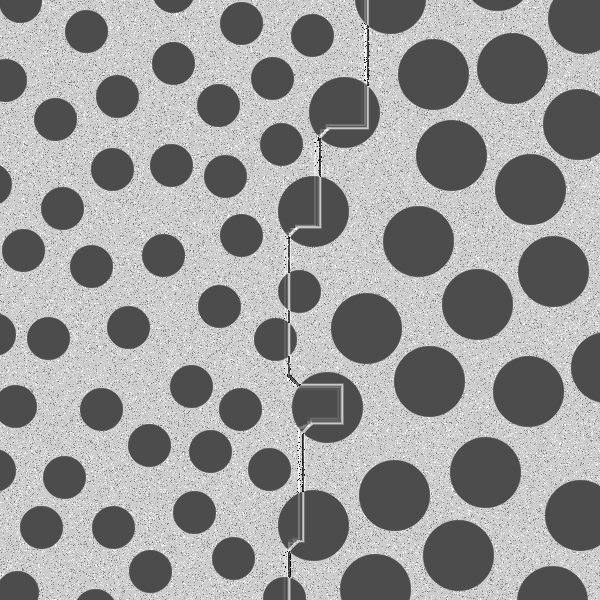

In [ ]:
import  numpy as np, cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/DIP3E_Original_Images_CH09/Fig0943(a)(dark_blobs_on_light_background).tif',cv2.IMREAD_GRAYSCALE)

# defining a closing function but doing closing we will use dailation and errosion which use circular SE
def dailation(img,se):
  se_h,se_w = se.shape
  padded_img = np.pad(img, pad_width=se_h-1//2, mode = 'reflect')
  dailated_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+se_h, j:j+se_w]
      dailated_img[i,j] =np.max(neighbor *se )

  return dailated_img

def errosion(img,se):
  se_h,se_w = se.shape
  padded_img = np.pad(img, pad_width=se_h-1//2, mode = 'reflect')
  erroded_img = np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neighbor = padded_img[i:i+se_h, j:j+se_w]
      erroded_img[i,j] =np.min(neighbor * se)

  return erroded_img

def closing(img , rad):
  dailate_img = dailation(img,rad)
  erod_img = errosion(dailate_img,rad)
  return erod_img

def morphological_gradient(img, se):
    dilated_img = dailation(img, se)
    eroded_img = errosion(img, se)
    return dilated_img - eroded_img

# now calling the function closing giving the radius = 20
structur_elem = np.ones((41,41))
img_closed_rad = closing(image,structur_elem)
se = np.ones((100,140))
img_opened_rad =errosion(img_closed_rad,se)

gradient_img = morphological_gradient(img_opened_rad,np.ones((3,3)))
final_gradient= gradient_img + image
cv2_imshow(img_closed_rad)
cv2_imshow(img_opened_rad)
cv2_imshow(final_gradient)
